In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import sys
import pandas as pd
import geopandas as gpd
import xarray as xr
import io, requests
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
import glob

### Just to remove warnings to prettify the notebook. 
import warnings
warnings.filterwarnings("ignore")

In [2]:
### consts
path_to_ccm_results = './data/processed/'

In [3]:
eco_regions = ['Middle Rockies',
               'Klamath Mountains',
               'Sierra Nevada',
               'Wasatch and Uinta Mountains',
               'Southern Rockies',
               'Idaho Batholith',
               'Columbia Mountains/Northern Rockies',
               'Canadian Rockies',
               'North Cascades',
               'Blue Mountains',
               'Cascades',
               'Eastern Cascades Slopes and Foothills',
               'Central Basin and Range',
               'Arizona/New Mexico Mountains',
               'Northern Basin and Range']

In [4]:
# read in NA ECO_LEVEL 3 raster files
gdf = gpd.read_file('../data/NA_CEC_Eco_Level3/')

wus_eco = gdf[gdf['NA_L3NAME'].isin(eco_regions)]

In [5]:
# Define the CartoPy CRS object.
crs = ccrs.PlateCarree()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
wus_eco = wus_eco.to_crs(crs_proj4)

---

In [6]:
ccm_results_flist = np.sort(glob.glob(path_to_ccm_results+'*.nc'))

In [7]:
ccm_results_flist

array(['./data/processed/ccm_SLP_tau_1.nc',
       './data/processed/ccm_SLP_tau_3.nc',
       './data/processed/ccm_SLP_tau_6.nc',
       './data/processed/ccm_SST_tau_1.nc',
       './data/processed/ccm_SST_tau_3.nc',
       './data/processed/ccm_SST_tau_6.nc'], dtype='<U33')

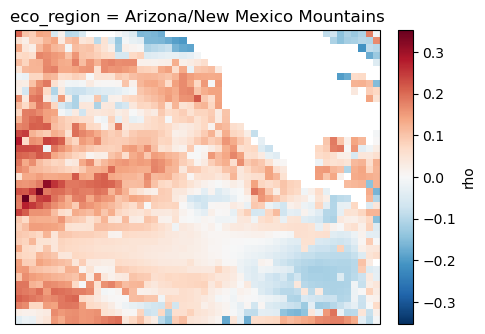

In [9]:
# def plot_ccm(f):
f = ccm_results_flist[3]

ccm_xr = xr.open_dataset(f)
fig = plt.figure(figsize=(12, 15), constrained_layout=True)
# create gridspec
gs = fig.add_gridspec(5,3, width_ratios=[1,1,1],
                      height_ratios=[1,1,1,1,1])

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree(central_longitude=180))
ccm_xr.isel(eco_region=0).rho.plot(ax=ax1,
                                   transform=ccrs.PlateCarree())
plt.show()

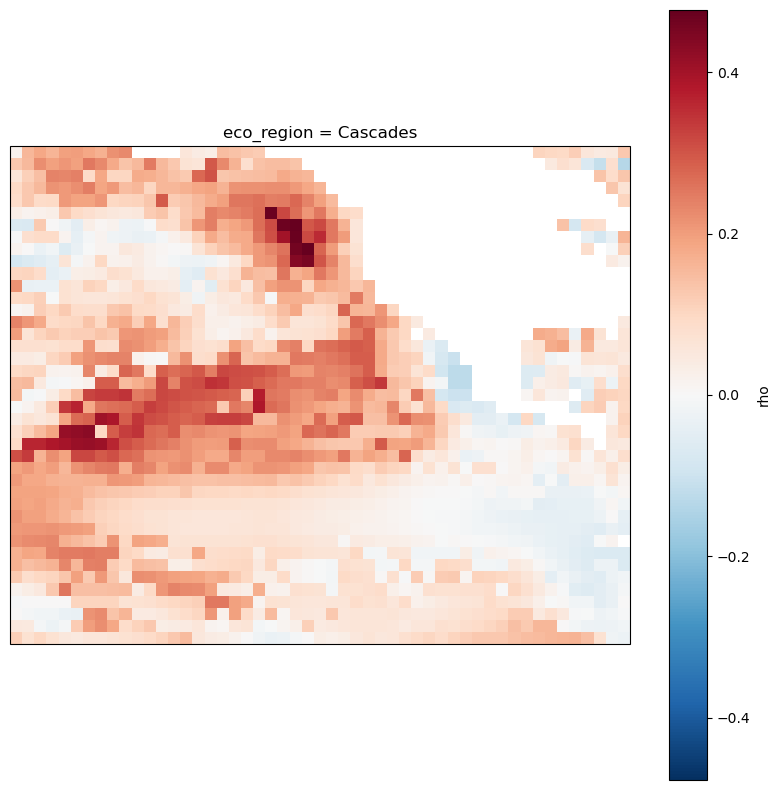

In [10]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
# ax.coastlines(resolution='50m', color='black', linewidth=1)

# ax.set_extent([0, 360, -60, 60], crs=ccrs.PlateCarree())
ccm_xr.isel(eco_region=3).rho.plot(ax=ax, transform=ccrs.PlateCarree())

In [11]:
ccm_xr.isel(eco_region=0)

<xarray.Dataset>
Dimensions:     (lat: 41, lon: 51)
Coordinates:
    eco_region  <U28 'Arizona/New Mexico Mountains'
  * lat         (lat) float64 -20.0 -18.0 -16.0 -14.0 ... 54.0 56.0 58.0 60.0
  * lon         (lon) float64 180.0 182.0 184.0 186.0 ... 276.0 278.0 280.0
Data variables:
    rho         (lat, lon) float64 ...

In [11]:
ccm_xr.isel(eco_region=0).rho.min()

<xarray.DataArray 'rho' ()>
array(-0.21)
Coordinates:
    eco_region  <U28 'Arizona/New Mexico Mountains'

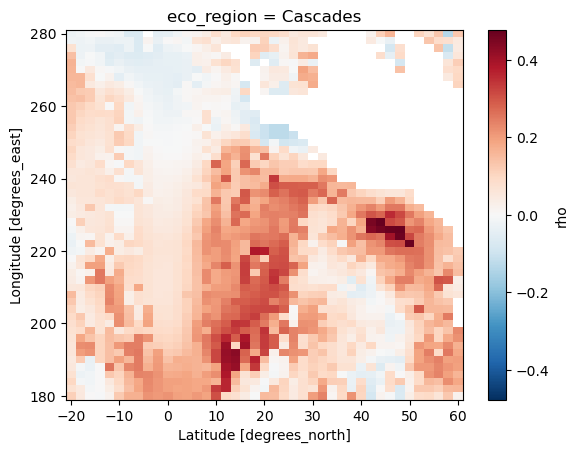

In [15]:
ccm_xr.isel(eco_region=3).rho.plot()